<a href="https://colab.research.google.com/github/Elma-dev/Deep_Learning_Specialization/blob/main/Deep_Learning_Specialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [4]:
!unzip "/content/drive/MyDrive/Files.zip"

Archive:  /content/drive/MyDrive/Files.zip
  inflating: Files/datasets/train_catvnoncat.h5  
  inflating: Files/datasets/test_catvnoncat.h5  


# Vectorization

In [ ]:
#Sum Of Column Without for loop
A=np.array([[65,0,4.4,68]
         ,[1.2,104,52,8]
         ,[1.8,135,99,0.9]])

ones=np.ones((1,3))
np.dot(ones,A)

array([[ 68. , 239. , 155.4,  76.9]])

In [ ]:
#Vectorization Vs forLoop
A=np.random.rand(10000)
B=np.random.rand(10000)

#Vectorization
tic=time.time()
c=np.dot(A,B)
tac=time.time()
print(f"result={c} the operation take: {(tac-tic)*1000}ms")

#For Loop
c=0
tic=time.time()
for i in range(10000):
  c+=A[i]*B[i]
tac=time.time()
print(f"result={c} the operation take: {(tac-tic)*1000}ms")

result=2490.9727078056144 the operation take: 0.3638267517089844ms
result=2490.97270780561 the operation take: 12.353658676147461ms


# Trics

In [ ]:
#Row Vector / Column Vector / Rank 1 array

#Rank 1 array
print(f"rank_1_array:\n{np.random.randn(5)}") #-> don't use it
print(f"column_vector:\n{np.random.randn(1,5)}")
print(f"row_vector:\n{np.random.randn(5,1)}")

rank_1_array:
[ 1.57616845  1.66386509 -0.95576009  1.05843147  0.02352394]
column_vector:
[[-0.60440295 -0.01462151 -2.3902544   1.05783492 -0.74696992]]
row_vector:
[[ 0.44905297]
 [ 1.33335196]
 [-0.14648774]
 [ 0.10846736]
 [-0.23346869]]


In [ ]:
a=np.array([[2,1],[1,3]])
np.dot(a,a)

array([[ 5,  5],
       [ 5, 10]])

In [ ]:
a=np.random.randn(12288,150)
b=np.random.randn(150,45)

np.dot(a,b).shape
a.sum()

249.40261845499705

In [ ]:
a=np.random.randn(2,3)
b=np.random.randn(2,1)
a+b

array([[1.93973714, 0.42668552, 2.36734779],
       [0.62475678, 0.98298616, 1.22136655]])

#<center>**Logistic_Regression_with_a_Neural_Network_mindset**</center>

### **Load Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import scipy
import PIL

from PIL import Image
from scipy import ndimage

In [9]:
def load_dataset():
  train_dataset=h5py.File("Files/datasets/train_catvnoncat.h5")
  train_set_x_orig=np.array(train_dataset["train_set_x"][:])#train features
  train_set_y_orig=np.array(train_dataset["train_set_y"][:])

  test_dataset=h5py.File("Files/datasets/test_catvnoncat.h5")
  test_set_x_orig=np.array(test_dataset["test_set_x"][:])#test features
  test_set_y_orig=np.array(test_dataset["test_set_y"][:])

  classes=np.array(test_dataset["list_classes"][:])#the list of classes

  train_set_y_orig=train_set_y_orig.reshape((1,train_set_y_orig.shape[0]))
  test_set_y_orig=test_set_y_orig.reshape((1,test_set_y_orig.shape[0]))

  return train_set_x_orig,train_set_y_orig,test_set_x_orig,test_set_y_orig


In [10]:
#read data
train_set_in,train_set_out,test_set_in,test_set_out=load_dataset()

In [11]:
#show the shapes of each var
print(f"shape train test {train_set_in.shape}") #==> (nbrImg,x,y,depth)
print(f"shape train test {train_set_out.shape}")
print(f"shape train test {test_set_in.shape}")
print(f"shape train test {test_set_out.shape}")

shape train test (209, 64, 64, 3)
shape train test (1, 209)
shape train test (50, 64, 64, 3)
shape train test (1, 50)


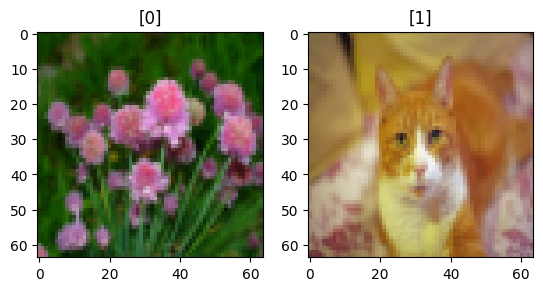

In [12]:
f,ax=plt.subplots(1,2)
ax[0].imshow(train_set_in[21])
ax[0].title.set_text(f"{train_set_out[:,21]}")
ax[1].imshow(train_set_in[24])
ax[1].title.set_text(f"{train_set_out[:,24]}")
plt.show()

## **Image Flaten**
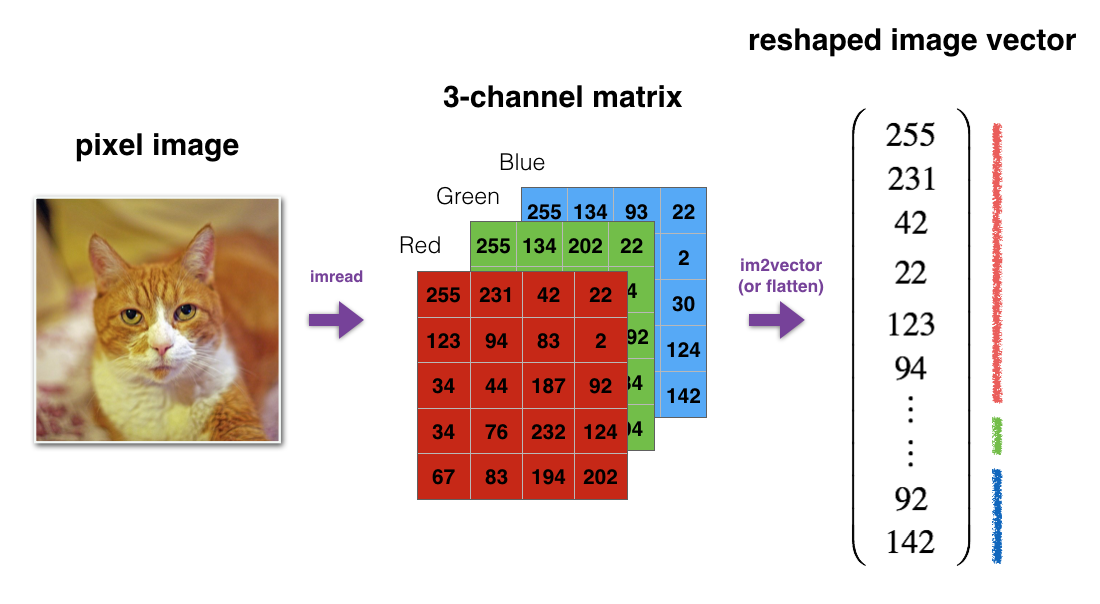

In [13]:
#Reshape the training and test image --> flaten each image
train_img=train_set_in.reshape(train_set_in.shape[0],-1).T #==>(nbrImge,flatenEachImage) & transpose to be vect
test_img=test_set_in.reshape(test_set_in.shape[0],-1).T

<center>
<table style="width:35%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (12288, 209)</td>
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(1, 209)</td>
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(12288, 50)</td>
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(1, 50)</td>
  </tr>
</table>
</center>

In [14]:
train_img

array([[ 17, 196,  82, ..., 143,  22,   8],
       [ 31, 192,  71, ..., 155,  24,  28],
       [ 56, 190,  68, ..., 165,  23,  53],
       ...,
       [  0,  82, 138, ...,  85,   4,   0],
       [  0,  80, 141, ..., 107,   5,   0],
       [  0,  81, 142, ..., 149,   0,   0]], dtype=uint8)

##**"Standardize" the data**

In [15]:
#standarization of image
train_img=train_img/255
test_img=test_img/255

In [16]:
train_img

array([[0.06666667, 0.76862745, 0.32156863, ..., 0.56078431, 0.08627451,
        0.03137255],
       [0.12156863, 0.75294118, 0.27843137, ..., 0.60784314, 0.09411765,
        0.10980392],
       [0.21960784, 0.74509804, 0.26666667, ..., 0.64705882, 0.09019608,
        0.20784314],
       ...,
       [0.        , 0.32156863, 0.54117647, ..., 0.33333333, 0.01568627,
        0.        ],
       [0.        , 0.31372549, 0.55294118, ..., 0.41960784, 0.01960784,
        0.        ],
       [0.        , 0.31764706, 0.55686275, ..., 0.58431373, 0.        ,
        0.        ]])

##**General Architecture of the learning algorithm**
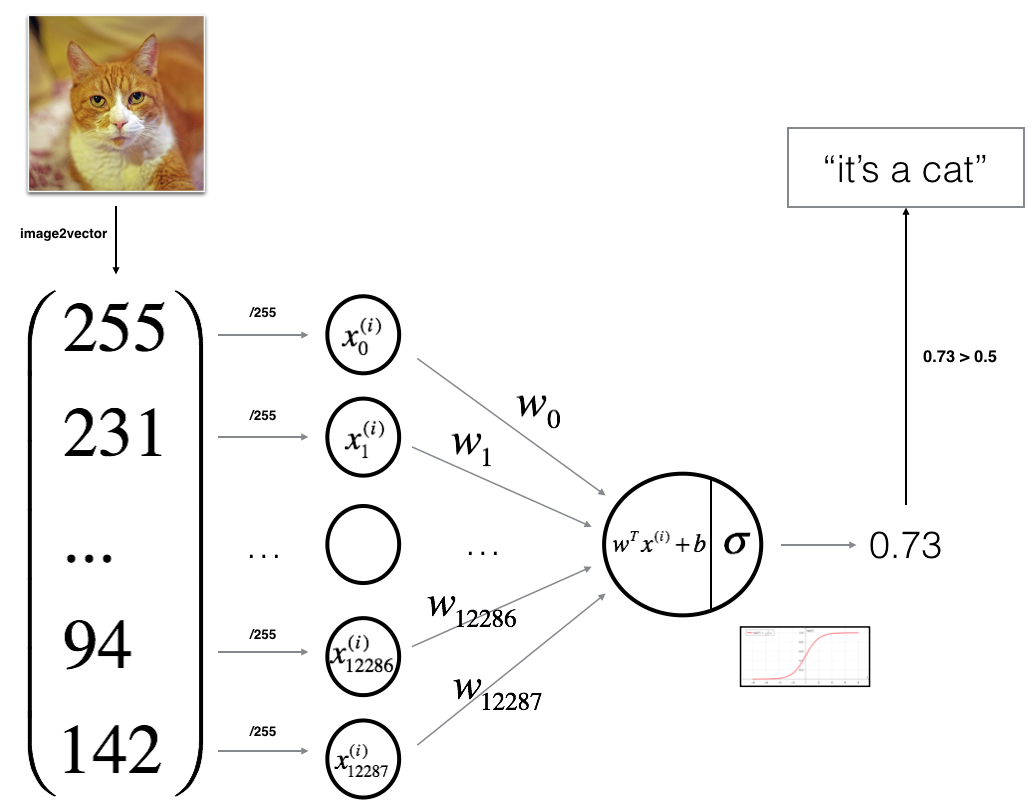

## **Sogmoid Function**
<center>
$sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$
</center>

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [ ]:
#test
print(f"{sigmoid(0)}")
print(f"{sigmoid(np.array([2,3]))}")

0.5
[0.88079708 0.95257413]


##**Propagate**
<center>
$A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$

* ***Cost Function***

$J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$
* ***Gradient***
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$
</center>

In [ ]:
def propagate(w,b,X,Y):
  #Calculate z
  z=np.dot(w.T,X)+b
  #Calculate A
  A=sigmoid(z)
  #Calcualte Cost Function
  m=X.shape[0]
  J= -np.sum((Y*np.log(A) + (1-Y)*np.log(1-A)))/m
  #Calculate db,dw
  dw=np.dot(X,(A-Y).T)/m
  db=np.sum(A-Y)/m
  return dw,db,J

In [ ]:
#Test
w=np.zeros((train_img.shape[0],1))
b=0.0
X=train_img
Y=train_set_out
z=np.dot(w.T,X)+b
#Explanation
print(f"w.T.shape * X.shape = z.shape ==> {w.T.shape , X.shape , z.shape}")
#Test
print(f"Propagate: {propagate(w,b,X,Y)}")

w.T.shape * X.shape = z.shape ==> ((1, 12288), (12288, 209), (1, 209))
Propagate: (array([[0.00080295],
       [0.00107151],
       [0.00083742],
       ...,
       [0.00086311],
       [0.00105667],
       [0.00055195]]), 0.0026448567708333335, 0.01178936854956287)


## **Gradient Descent**

In [ ]:
import copy
def gradientDescent(w,b,X,Y,iter=1000,alpha=0.01):
  errors=[]
  w,b=copy.deepcopy(w),copy.deepcopy(b)
  for i in range(iter):
    dw,db,cost=propagate(w,b,X,Y)
    w-=alpha*dw
    b-=alpha*db
    errors.append(cost)
  return {"w":w,"b":b,"errors":errors}


Gradient Descent: 


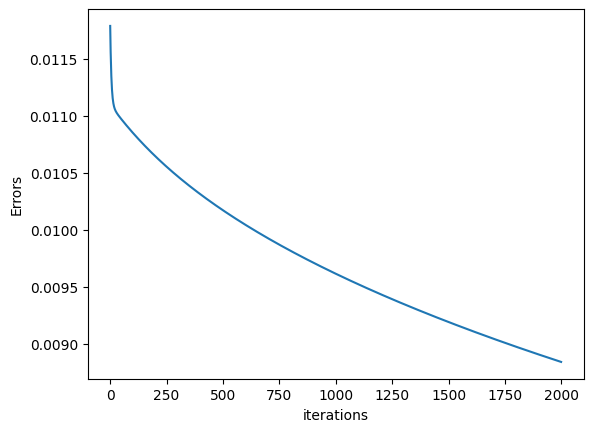

In [ ]:
#Test
w=np.zeros((train_img.shape[0],1))
b=0.0
X=train_img
Y=train_set_out
#Test
print(f"Gradient Descent: ")
results=gradientDescent(w,b,X,Y,iter=2000)
plt.plot(range(2000),results["errors"])
plt.xlabel("iterations")
plt.ylabel("Errors")
plt.show()

#**Neural Network : Hidden Layer**

In [ ]:
w=np.random.rand(4,3)
X=np.random.rand(2,3)
b=np.random.rand(1,4)
w_out=np.random.rand(1,4)
b_out=0.01

In [ ]:
print(f'shape(w)={w.shape}')
print(f'shape(X)={X.shape}')
print(f'shape(b)={b.shape}')
print(f'shape(w_out)={w_out.shape}')

shape(w)=(4, 3)
shape(X)=(2, 3)
shape(b)=(1, 4)
shape(w_out)=(1, 4)


In [ ]:
#4 neuron in hidenLayer # 3 input in each row
print(f'w={w}')
print(f'X={X}')
print(f'b={b}')
print(f'w_out={w_out}')

w=[[0.56597542 0.11281562 0.9008307 ]
 [0.75446871 0.67547955 0.85080032]
 [0.70349381 0.17954424 0.36919021]
 [0.0097813  0.95565861 0.38667627]]
X=[[0.52213635 0.8785639  0.56026433]
 [0.02986885 0.27604253 0.11822609]]
b=[[0.29038254 0.7700235  0.72751797 0.82502043]]
w_out=[[0.5670256  0.53605661 0.08971688 0.26928204]]


In [ ]:
#without vectorization
print(np.dot(w[0],X[0]))
print(np.dot(w[0],X[1]))
print('-------------------')
print(np.dot(w[1],X[0]))
print(np.dot(w[1],X[1]))
print('-------------------')
print(np.dot(w[2],X[0]))
print(np.dot(w[2],X[1]))
print('-------------------')
print(np.dot(w[3],X[0]))
print(np.dot(w[3],X[1]))
print('-------------------')
#with vect
Z=np.dot(w,X.T)+b.T   # Z[[z0i],[z1i]]
print(f'Z={Z}')
print('-------------------')
Z=Z.T # Z[[zi0],[zi1]]
print(f'Z={Z}')
print('-------------------')
#Activation function
A=1/(1+np.exp(-Z))
print(f'A={A}')
print('-------------------')
#Output Layer
Z_out=np.dot(w_out,A.T)+b_out
print(f'Z_out={Z_out}')
print('-------------------')
A_out=1/(1+np.exp(-Z_out))
print(f'A_out={A_out}')

0.8993353755181784
0.1545486370097191
-------------------
1.4640605555144663
0.3095829957417213
-------------------
0.7319048828665948
0.114222313591268
-------------------
1.0613552508256636
0.3098098040524802
-------------------
Z=[[1.18971791 0.44493117]
 [2.23408406 1.0796065 ]
 [1.45942286 0.84174029]
 [1.88637568 1.13483023]]
-------------------
Z=[[1.18971791 2.23408406 1.45942286 1.88637568]
 [0.44493117 1.0796065  0.84174029 1.13483023]]
-------------------
A=[[0.76669061 0.90326879 0.81144439 0.86834174]
 [0.6094334  0.74641951 0.69883161 0.7567292 ]]
-------------------
Z_out=[[1.2355655  1.02215803]]
-------------------
A_out=[[0.77479118 0.73539274]]


In [ ]:
A=np.random.randn(4,3)
B=np.sum(A,axis=1,keepdims=True)
B.shape

(4, 1)

## **Building Neural Network with One Hiden Layer**

In [ ]:
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

In [ ]:
X,Y=load_planar_dataset()

In [ ]:
print(f'X.shape={X.shape}')
print(f'Y.shape={Y.shape}')

X.shape=(2, 400)
Y.shape=(1, 400)


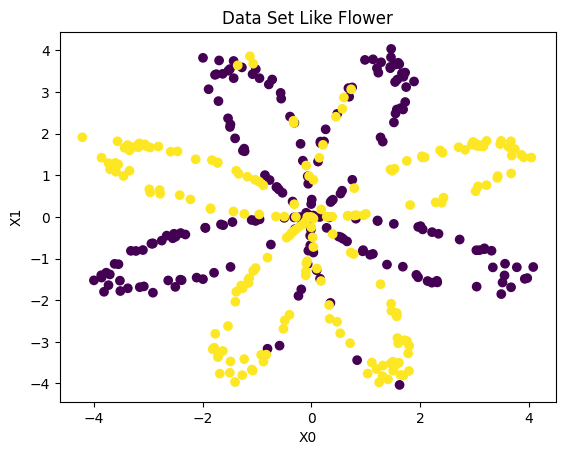

In [ ]:
plt.scatter(X[0,:],X[1,:],c=Y)
plt.xlabel("X0")
plt.ylabel("X1")
plt.title("Data Set Like Flower")
plt.show()

**Trying to build a NN can classify our data set**

---



*   **Our data set has tow class (Binary Classification)**
*   **We build a NN with the next parameters:**

  *   input layer size  : 2
  *   hidden layer size : 4
  *   output layer size : 1

* **To build any NN we should to follow the next steps:**
    1. Define the neural network structure ( # of input units,  # of hidden units, etc).
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)



---




In [ ]:
#1: Defin The NN Structure
def neuralNetStruct(n_i,n_h,n_o):
  return {"n_i":n_i,"n_h":n_h,"n_o":n_o}

In [ ]:
#2: Initialize Model Params
def parameters(nnStruct):
  W1=np.random.randn(nnStruct["n_h"],nnStruct["n_i"])
  b1=np.zeros((nnStruct["n_h"],1))
  W2=np.random.randn(nnStruct["n_o"],nnStruct["n_h"])
  b2=np.zeros((nnStruct["n_o"],1))
  return {"W1":W1,"b1":b1,"W2":W2,"b2":b2}

In [ ]:
#Test 1
parameters(neuralNetStruct(2,4,1))

{'W1': array([[ 0.81434313,  0.78046993],
        [-1.46405357, -0.15449119],
        [-0.09243232, -0.23787527],
        [-0.75566277,  1.85143789]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[ 0.20909668,  1.55501599, -0.56914865, -1.06179676]]),
 'b2': array([[0.]])}

**<center>Forward Equation</center>**

$$Z^{[1]} =  W^{[1]} X + b^{[1]}\tag{1}$$
$$A^{[1]} = \tanh(Z^{[1]})\tag{2}$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}\tag{3}$$
$$\hat{Y} = A^{[2]} = \sigma(Z^{[2]})\tag{4}$$

In [ ]:
#3: Forward Propagation
def forwardPropagation(X,parameters):
  Z1=np.dot(parameters['W1'],X)+parameters['b1']
  A1=np.tanh(Z1)
  Z2=np.dot(parameters['W2'],A1)+parameters['b2']
  A2=sigmoid(Z2)
  return {'out':A2,'cash':{'Z1':Z1,'A1':A1,'Z2':Z2}}

In [ ]:
#Test 2
out=forwardPropagation(X,parameters(neuralNetStruct(2,4,1)))['out']
cash=forwardPropagation(X,parameters(neuralNetStruct(2,4,1)))['cash']
print(f'out.shape={out.shape}')

out.shape=(1, 400)


**<center>Cost Function</center>**
$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

In [ ]:
#4: Comput Cost
def cost(Y,Y_hat):
  m=Y.shape[1]
  log=np.multiply(Y,np.log(Y_hat))+np.multiply(1-Y,np.log(1-Y_hat))
  sum=-np.sum(log)/m
  return sum

In [ ]:
#Test 3
c=cost(Y,forwardPropagation(X,parameters(neuralNetStruct(2,4,1)))['out'])
print(f'cost={c}')

cost=1.3228871944341338


**<center>Back Propagation for 1 Hidden Layer Ops</center>**

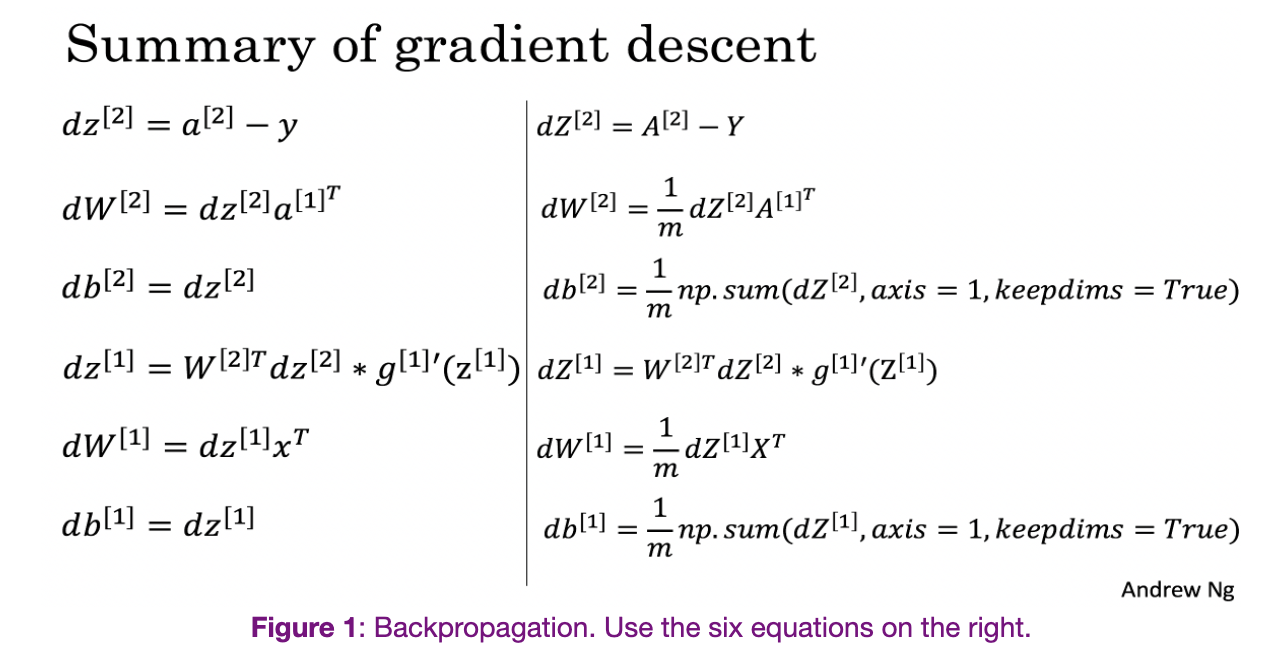

In [ ]:
#5: backWord Propagation function
def backPropagation(X,Y,cash,params):
  m=X.shape[1]
  dZ2=cash['out']-Y
  dW2=np.dot(dZ2,cash['cash']['A1'].T)/m
  db2=np.sum(dZ2,axis=1,keepdims=True)/m
  dZ1=np.multiply(np.dot(params['W2'].T,dZ2),1-np.power(cash['cash']['A1'],2))
  dW1=np.dot(dZ1,X.T)/m
  db1=np.sum(dZ1,axis=1,keepdims=True)/m

  return {'dW1':dW1,'db1':db1,'dW2':dW2,'db2':db2}

In [ ]:
#Test 5
backPropagation(X,Y,forwardPropagation(X,parameters(neuralNetStruct(2,4,1))),parameters(neuralNetStruct(2,4,1)))

{'dW1': array([[ 0.01990805,  0.01045022],
        [-0.00247328,  0.07893038],
        [-0.03958239, -0.0923789 ],
        [ 0.33191856, -0.0337561 ]]),
 'db1': array([[-0.00583802],
        [ 0.0073049 ],
        [-0.00028352],
        [-0.0066365 ]]),
 'dW2': array([[ 0.01781436,  0.16575347,  0.15284389, -0.09348675]]),
 'db2': array([[-0.00419253]])}

In [ ]:
#6: Gradien Descent function of nn with one hiden layer
import copy
def gradientDescent(params,grads,alpha=0.01):
  W1,b1,W2,b2=copy.deepcopy(params["W1"]),copy.deepcopy(params["b1"]),copy.deepcopy(params["W2"]),copy.deepcopy(params["b2"])
  dW1,db1,dW2,db2=grads['dW1'],grads['db1'],grads['dW2'],grads['db2']
  W1-=alpha*dW1
  b1-=alpha*db1
  W2-=alpha*dW2
  b2-=alpha*db2
  params={'W1':W1,'b1':b1,'W2':W2,'b2':b2}
  return params

In [ ]:
def buildNN(X,Y,n_h,alpha=0.01,iter=100,show=False):
  params=parameters(neuralNetStruct(X.shape[0],n_h,1))
  for i in range(iter):
    forward=forwardPropagation(X,params)
    grads=backPropagation(X,Y,forward,params)
    params=gradientDescent(params,grads,0.01)
    if i%100==0 and show==True:
      print(f'iter: {i} cost={cost(Y,Y_hat=forward["out"])}')
  return params

In [ ]:
#Test
buildNN(X,Y,4,1.2,100000)

{'W1': array([[-0.14042177,  1.9171462 ],
        [ 3.05090082,  3.66849871],
        [ 3.48505617, -4.51221449],
        [ 0.08675543,  5.08571822]]),
 'b1': array([[-0.47664457],
        [ 0.13595124],
        [ 0.06905635],
        [ 0.28028901]]),
 'W2': array([[ 2.52630367, -4.55065977,  4.67579587,  4.96827243]]),
 'b2': array([[0.07256059]])}

In [ ]:
#Predict Function
def predict(params,X):
  out,cash=forwardPropagation(X,params).values()
  out=out>0.5
  return out

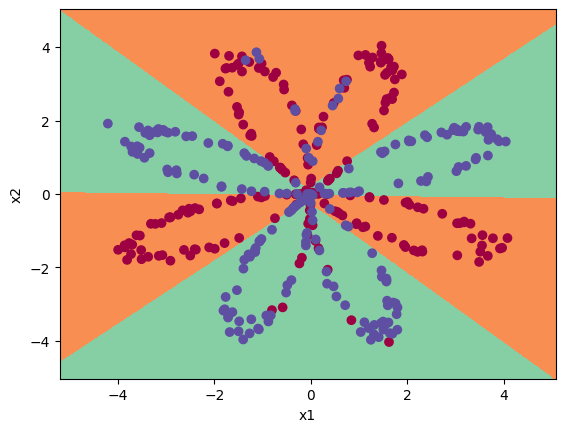

In [ ]:
#Test
paramsPredict=buildNN(X,Y,4,1.2,10000)
Y_hat=predict(paramsPredict,X)
plot_decision_boundary(lambda x: predict(paramsPredict, x.T), X, Y)

# <center>**Building Deep NNetwork**</center>



---


**In this section i'll try to build a Deep Neural Network from scratch:**

* Implementation of **Forward Propagation**
* Implementation of **Backward Propagation**

---
**I flow the next schema to achieve to up goal :**
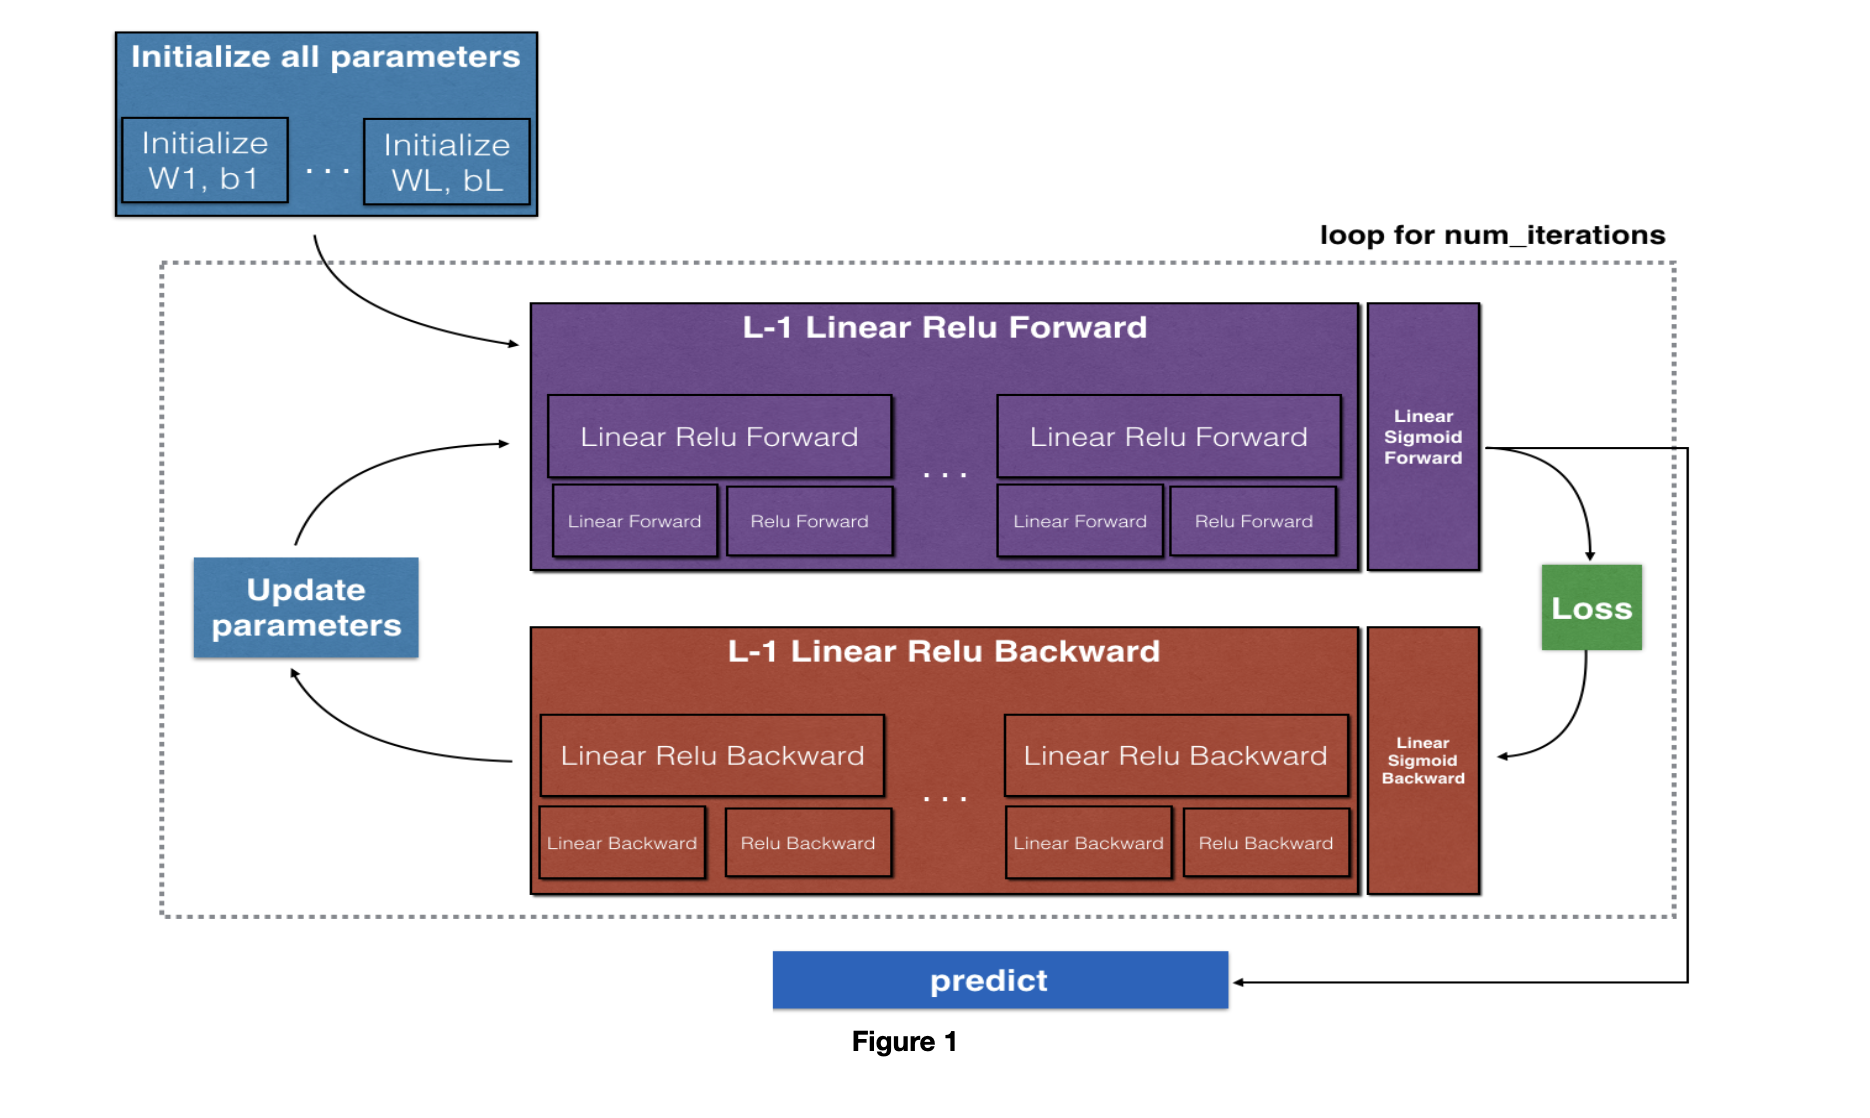

## **Forward Propagation Operations**

### **Initialize All Parameters**

In [17]:
#Create function to initialize all params:
#All we need is layer dims : list contains (L0,L1,...,Ln)
def initializeParams(layerDims):
  nbrLayer=len(layerDims)
  parameters={}
  for i in range(1,nbrLayer):
    parameters["W"+str(i)]=np.random.randn(layerDims[i],layerDims[i-1])*0.01
    parameters["b"+str(i)]=np.zeros((layerDims[i],1))
  return parameters

In [18]:
#Test : create NN(2,4,1)
NNLayers=[2,4,1]
print(f'params={initializeParams(NNLayers)}')

params={'W1': array([[ 0.01253238, -0.01304519],
       [ 0.00354997, -0.0093057 ],
       [ 0.00382807,  0.00113552],
       [ 0.01013483, -0.00555382]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[ 0.00905566, -0.02378476, -0.00262825, -0.00181374]]), 'b2': array([[0.]])}


### **Forward Propagation**

#### **Linear Forward**
- When we calculate linear forward Z we should to save the value of **cache (A[l-1],W,b),Z** because we'll use it in backward calculation

In [19]:
def linearForward(A,W,b):
  Z=np.dot(W,A)+b
  cache=(A,W,b)
  return Z,cache

#### **Linear Activation Forward**
- Calculation of activation function in forward means calculation of output of layer/units and in each calculation of it we should to save **linear cache and activation cache**
- Linear Cache **->** calculation of dz
- Activation Cache **->** calculation da

In [20]:
#Activation Functions
def sigmoid(Z):
  return 1/(1+np.exp(-Z)),Z
def relu(Z):
  return np.maximum(0,Z),Z

In [38]:
def linearActivationForward(A_prev,W,b,activation="sigmoid"):
  Z,linear_cache=linearForward(A_prev,W,b)
  if activation=="sigmoid":
    A,activation_cache=sigmoid(Z)
  elif activation=="relu":
    A,activation_cache=relu(Z)
  cache=(linear_cache,activation_cache)
  return A,cache

### **L layer Model Forward**
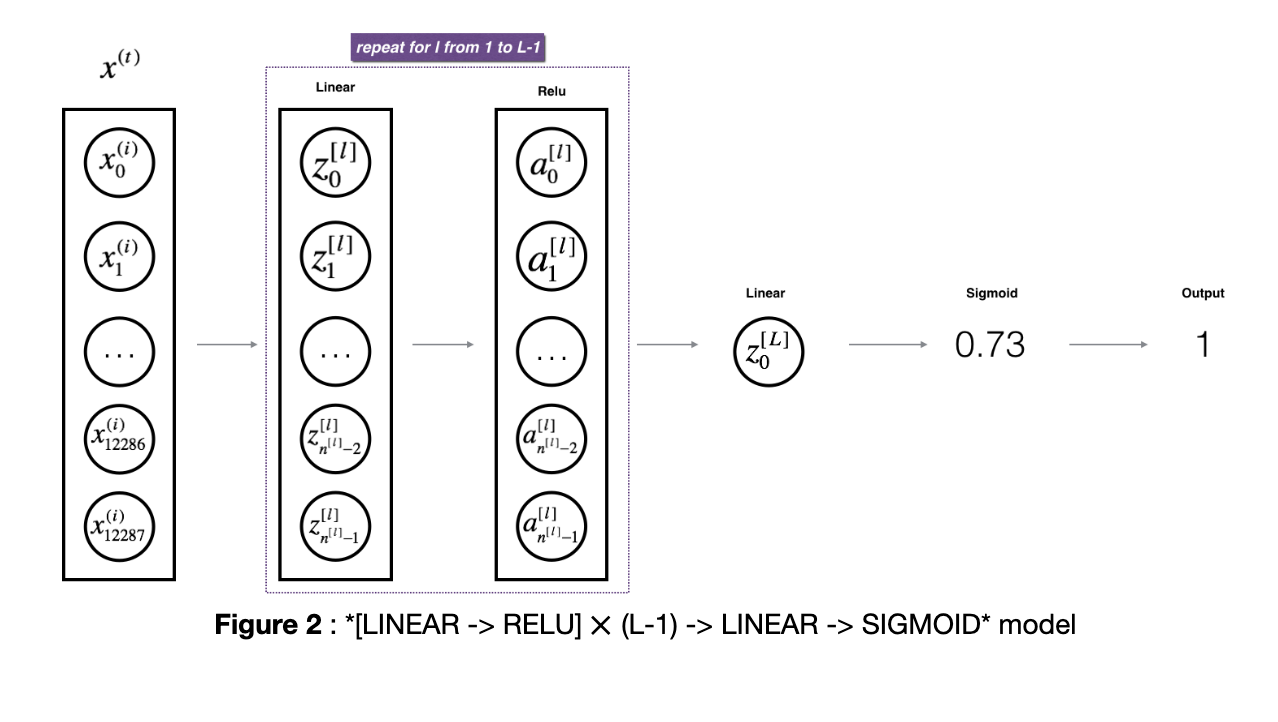

In [22]:
def lLayerModelForward(parameters,X):
  nbrLayers=len(parameters)//2  #divided by 2 because params has wi and bi
  caches=[]
  A=X #A0
  # we have relu function as an activation function in l-1 layer and sigmoid function in layer l
  for l in range(1,nbrLayers+1):
    A_prev=A
    W,b=parameters["W"+str(l)],parameters["b"+str(l)]
    if l!=nbrLayers:
      A,cache=linearActivationForward(A_prev,W,b,activation='relu')
    else:
      A,cache=linearActivationForward(A_prev,W,b,activation='sigmoid')
    caches.append(cache)
  return A,caches

## **Cost Function**

In [23]:
def cost(Y,Y_hat):
  m=Y.shape[1]
  loss=np.multiply(Y,np.log(Y_hat))+np.multiply((1-Y),np.log(1-Y_hat))
  cost=-np.sum(loss)/m
  return cost

## **Backward Propagation Operations**
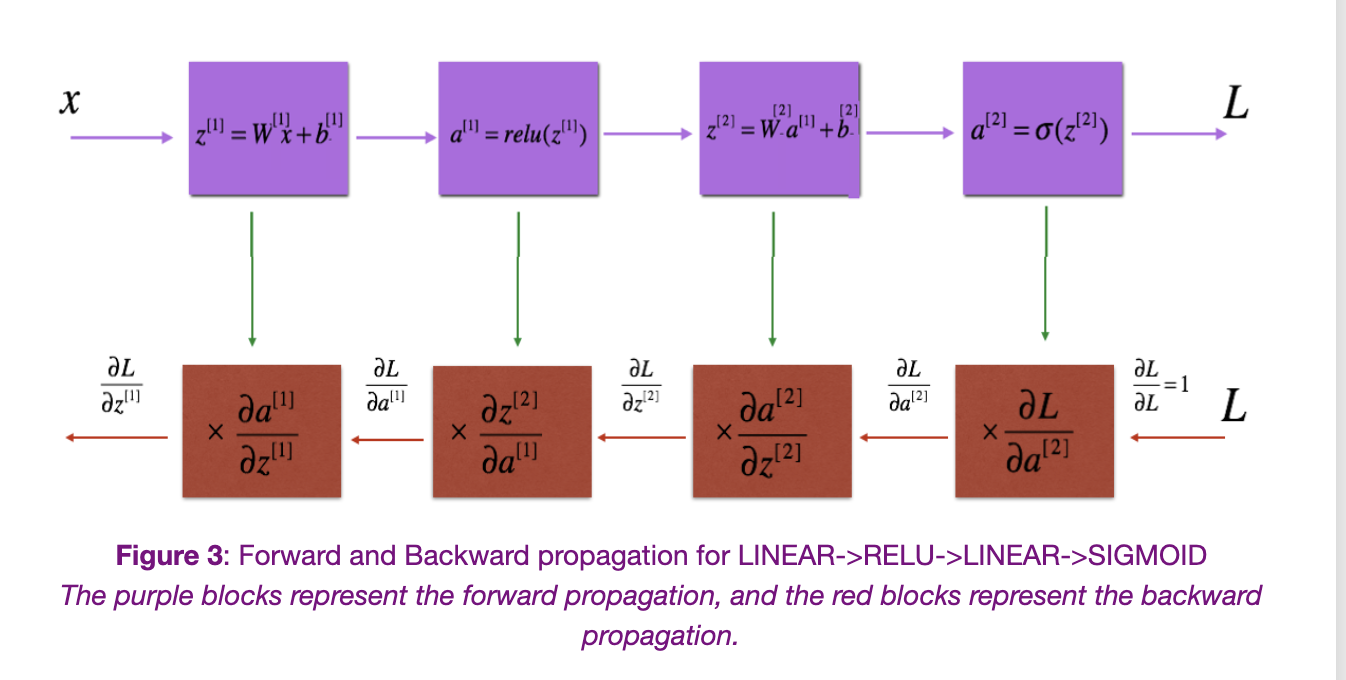

### **Linear Backward**
- For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

- Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. You want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.
- The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.

Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$

In [24]:
def linearBackward(dZ,linCache):
  A_prev,W,b=linCache
  m=A_prev.shape[1]
  #Calculation -> application of up operations
  dW=np.dot(dZ,A_prev.T)/m
  db=np.sum(dZ,axis=1,keepdims=True)/m
  dA_prev=np.dot(W.T,dZ)
  return dA_prev,dW,db

### **Linear Activation Function Backward**
```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: Implements the backward propagation for RELU unit. You can call it as follows:

```python
dZ = relu_backward(dA, activation_cache)
```

- If $g(.)$ is the activation function,
`sigmoid_backward` and `relu_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}). \tag{11}$$  

In [50]:
def sigmoid_backward(dA,activation_cache):
  Z=activation_cache
  s=1/(1+np.exp(-Z))
  dZ = dA * s * (1-s)
  return dZ

def relu_backward(dA,activation_cache):
  Z = activation_cache
  dZ = np.array(dA, copy=True) # just converting dz to a correct object.
  # When z <= 0, you should set dz to 0 as well.
  dZ[Z <= 0] = 0
  return dZ

In [26]:
#dA -- post-activation gradient for current layer l
def linearActivationBackward(dA,cache,activation):
  linear_cache,activation_cache=cache
  if activation=="sigmoid":
    dZ=sigmoid_backward(dA,activation_cache)
  elif activation=="relu":
    dZ=relu_backward(dA,activation_cache)
  dA_prev,dW,db=linearBackward(dZ,linear_cache)

  return dA_prev,dW,db


### **L Models Backwards**
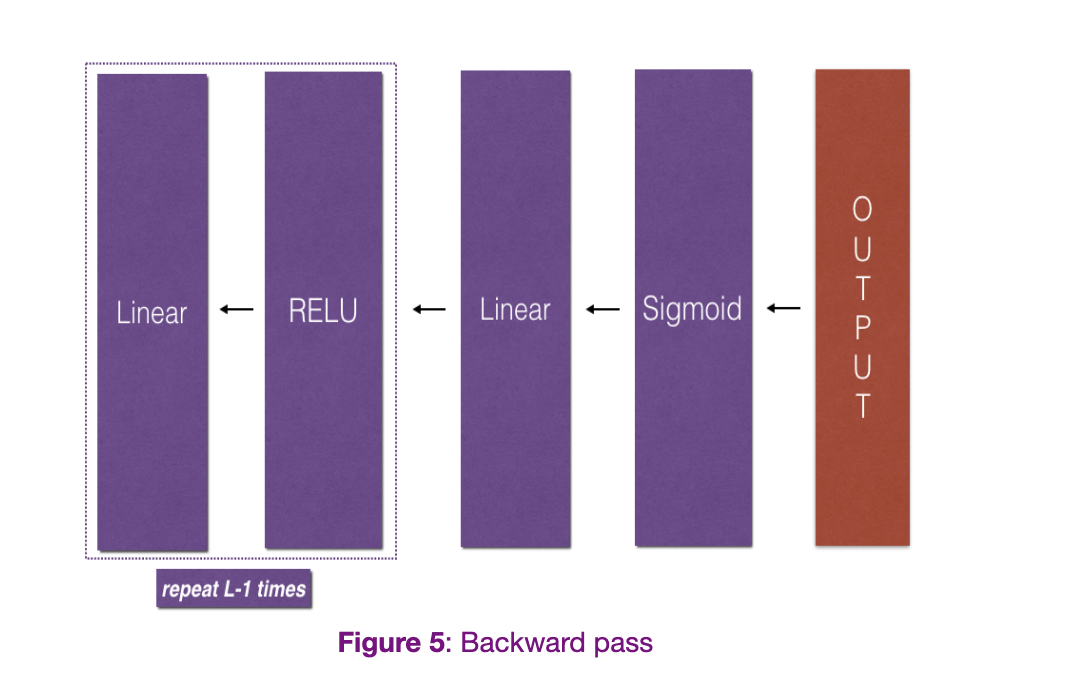

In [59]:
def lModelBackward(A,Y,caches):
  grads={}
  L=len(caches)
  #calculate dAL : the last layer
  dA=-(np.divide(Y,A)+np.divide(1-Y,1-A))
  cache=caches[L-1]
  #claculate grads of output layer
  grads["dA"+str(L-1)],grads["dW"+str(L)],grads["db"+str(L)]=linearActivationBackward(dA,cache,activation="sigmoid")

  for l in reversed(range(L-1)):
    cache=caches[l]
    grads["dA"+str(l)],grads["dW"+str(l+1)],grads["db"+str(l+1)]=linearActivationBackward(grads["dA"+str(l+1)],cache,activation="relu")
  return grads


### **Parameters Update**

In [60]:
import copy
def parametersUpdate(parameters,grads,alpha):
  params=copy.deepcopy(parameters)
  L=len(parameters)//2
  for i in range(L):
    params["W"+str(i+1)]-=alpha*grads["dW"+str(i+1)]
    params["b"+str(i+1)]-=alpha*grads["db"+str(i+1)]
  return params

## **Test Our Deep Neural Network In Classification Problem (Cat/NonCat)**

In [44]:
print(f'train_data_img_shape:{train_img.shape}')
print(f'test_data_img_shape:{test_img.shape}')
train_set_out

train_data_img_shape:(12288, 209)
test_data_img_shape:(12288, 50)


array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [61]:
#Trying to byuild DNN with this parameters:[12288, 20, 7, 5, 1]
def build(X,Y,layersDims,learning_rate,iter,show_cost=False):
  costs=[]
  #initializeParams
  parameters=initializeParams(layersDims)
  for i in range(iter):
    A_out,caches=lLayerModelForward(parameters,X)
    cost_=cost(Y,A_out)
    grades=lModelBackward(A_out,Y,caches)
    parameters=parametersUpdate(parameters,grades,learning_rate)
    if show_cost and i % 100 == 0 or i == iter - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost_)))
    if i % 100 == 0 or i == iter:
      costs.append(cost_)
  return parameters, costs

In [63]:
parameters, costs = build(train_img, train_set_out, layersDims=[12288, 20, 7, 5, 1],learning_rate=0.0075,iter=2500, show_cost=False)

print("Cost after first iteration: " + str(costs[0]))

<ipython-input-23-e1fb08d3a359>:3: RuntimeWarning: divide by zero encountered in log
  loss=np.multiply(Y,np.log(Y_hat))+np.multiply((1-Y),np.log(1-Y_hat))
<ipython-input-23-e1fb08d3a359>:3: RuntimeWarning: invalid value encountered in multiply
  loss=np.multiply(Y,np.log(Y_hat))+np.multiply((1-Y),np.log(1-Y_hat))
<ipython-input-59-415bcbd8bd4d>:5: RuntimeWarning: divide by zero encountered in true_divide
  dA=-(np.divide(Y,A)+np.divide(1-Y,1-A))
<ipython-input-59-415bcbd8bd4d>:5: RuntimeWarning: invalid value encountered in true_divide
  dA=-(np.divide(Y,A)+np.divide(1-Y,1-A))
<ipython-input-50-93793f67fd33>:4: RuntimeWarning: invalid value encountered in multiply
  dZ = dA * s * (1-s)


Cost after iteration 2499: nan
Cost after first iteration: 0.693147734155696
